In [25]:
# <snippet_imports>
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import sys
import time
# </snippet_imports>

images_folder = '../data/Kaggle Cheque Images/yolo x image/yolo x image/'

In [91]:
def extractfeatures(image):
    features = {}
    #Bankname
    bankname = image[:100, :250]
    features['bankname'] = bankname

    #Account Type
    accType = image[:50, 320:600]
    features['accType'] = accType

    #Date
    date = image[:75, 600:]
    features['date'] = date

    #Payee
    payee = image[80:130, 60:690]
    features['payee'] = payee

    #Amount
    amount = image[170:210, 580:745]
    features['amount'] = amount

    #ac/no
    accountno = image[245:280, 120:250]
    features['accountno'] = accountno
    
    #Signature
    sign = image[210:300, 500:]
    features['signature'] = sign

    return features

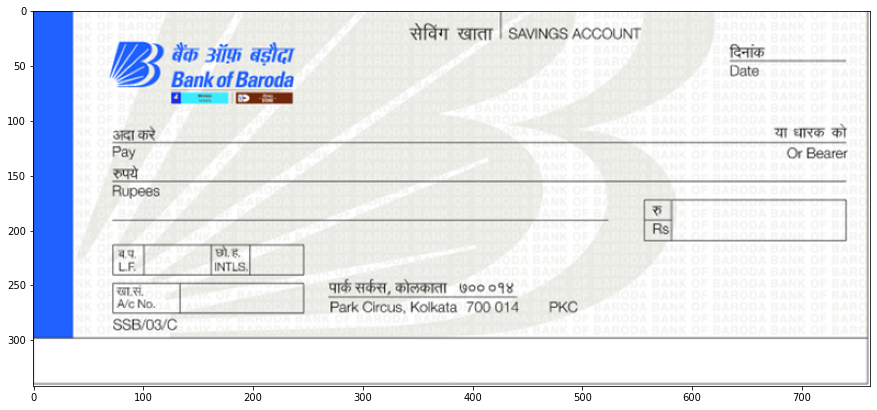

In [55]:
img = cv2.imread('../notebooks/bob-cheque example.png')
plt.figure(figsize=(15,15))
plt.imshow(img)

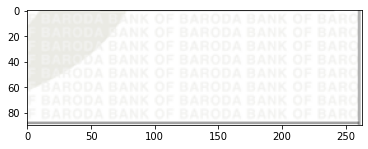

In [92]:
plt.imshow(img[210:300, 500:])

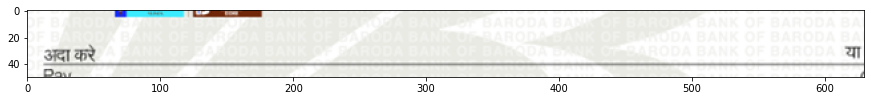

In [72]:
plt.figure(figsize=(15,15))
plt.imshow(extractfeatures(img)['payee'])

In [41]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
# <snippet_vars>
subscription_key = "ba19a4fe605643f2bdaea8872305424a"
endpoint = "https://paycheck-ocr.cognitiveservices.azure.com/"
# </snippet_vars>
# </snippet_imports_and_vars>

# <snippet_client>
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
# </snippet_client>
'''
END - Authenticate
'''

print("===== Read File - local =====")
# Get image path

# read_image_path = os.path.join (images_folder, "1.jpg")
read_image_path = os.path.join ('./test-img.jpg')
# Open the image
read_image = open(read_image_path, "rb")

# Call API with image and raw response (allows you to get the operation location)
read_response = computervision_client.read_in_stream(read_image, raw=True)
# Get the operation location (URL with ID as last appendage)
read_operation_location = read_response.headers["Operation-Location"]
# Take the ID off and use to get results
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for the retrieval of the results
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status.lower () not in ['notstarted', 'running']:
        break
    print ('Waiting for result...')
    time.sleep(10)

# Print results, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()
'''
END - Read File - local
'''

print("End of Computer Vision quickstart.")

===== Read File - local =====
Waiting for result...
AXIS BANK LTD
[51.0, 12.0, 140.0, 12.0, 140.0, 23.0, 51.0, 24.0]

End of Computer Vision quickstart.
